In [ ]:

import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
pokedex = pd.read_csv('/pokemon.csv')
pokedex

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,0.25,0.0,1.0,0.5,0.0,0.5,1.0,0.5,1.0,101,30720,0,570,25,Launch Pokémon,103,1250000,9.2,97,Tekkaguyaテッカグヤ,Celesteela,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5,181,30720,0,570,255,Drawn Sword Pokémon,131,1250000,0.3,59,Kamiturugiカミツルギ,Kartana,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5,101,30720,0,570,15,Junkivore Pokémon,53,1250000,5.5,223,Akuzikingアクジキング,Guzzlord,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,107,30720,0,600,3,Prism Pokémon,101,1250000,2.4,97,Necrozmaネクロズマ,Necrozma,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [ ]:

pokedex = pokedex[['name','hp','attack', 'defense','sp_attack','sp_defense','speed','is_legendary', 'against_normal', 'against_fire',
                  'against_water', 'against_electric', 'against_grass', 'against_ice',
                  'against_fight', 'against_poison', 'against_ground', 'against_flying',
                  'against_psychic', 'against_bug', 'against_rock', 'against_ghost',
                  'against_dragon', 'against_dark', 'against_steel', 'against_fairy','type1','type2']]
pokedex_leg = pokedex[pokedex['is_legendary']==1]
pokedex = pokedex[pokedex['is_legendary']==0]

In [ ]:
pokedex['type2'] = pokedex['type2'].fillna(0)
for x in range(len(pokedex['type1'])):
  if pokedex['type2'].iloc[x]==0:
    pokedex['type2'].iloc[x] = pokedex['type1'].iloc[x]


pokedex_leg['type2'] = pokedex_leg['type2'].fillna(0)
for x in range(len(pokedex_leg['type1'])):
  if pokedex_leg['type2'].iloc[x]==0:
    pokedex_leg['type2'].iloc[x] = pokedex_leg['type1'].iloc[x]


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



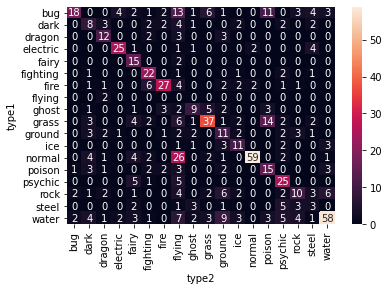

In [ ]:

sns.heatmap(pd.crosstab(pokedex['type1'],pokedex['type2']),annot=True)

In [ ]:
columns = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed','type2']
le = preprocessing.LabelEncoder()
pokedex['type1']=le.fit_transform(pokedex['type1'])
pokedex['type2']=le.fit_transform(pokedex['type2'])
pokedex


,name,hp,attack,defense,sp_attack,sp_defense,speed,is_legendary,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy,type1,type2
0,Bulbasaur,45,49,49,65,65,45,0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,9,13
1,Ivysaur,60,62,63,80,80,60,0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,9,13
2,Venusaur,80,100,123,122,120,80,0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,9,13
3,Charmander,39,52,43,60,50,65,0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,6,6
4,Charmeleon,58,64,58,80,65,80,0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,Drampa,78,60,85,135,91,36,0,1.0,0.5,0.5,0.5,0.50,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,2.0,12,2
780,Dhelmise,70,131,100,86,90,40,0,0.0,2.0,0.5,0.5,0.50,2.0,0.0,1.0,0.5,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,8,9
781,Jangmo-o,45,55,65,45,45,45,0,1.0,0.5,0.5,0.5,0.50,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2,2
782,Hakamo-o,55,75,90,65,70,65,0,1.0,0.5,0.5,0.5,0.50,2.0,1.0,1.0,1.0,2.0,2.0,0.5,0.5,1.0,2.0,0.5,1.0,4.0,2,5


In [ ]:

for x in list(set(pokedex_leg['type1']))[0:6]:
  pokedexn = pokedex[pokedex['type1']==x]
  fig = px.scatter_matrix(pokedexn[columns],
      dimensions=['attack', 'defense', 'sp_attack', 'sp_defense', 'speed'],
      height = 1400,
      width=1400,
      color = "type2")
  fig.update_layout(title=x)
  fig.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:68: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:68: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:68: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:68: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:68: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:68: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [ ]:
col_ag = ['against_normal', 'against_fire',
                  'against_water', 'against_electric', 'against_grass', 'against_ice',
                  'against_fight', 'against_poison', 'against_ground', 'against_flying',
                  'against_psychic', 'against_bug', 'against_rock', 'against_ghost',
                  'against_dragon', 'against_dark', 'against_steel', 'against_fairy']
for x in col_ag:
  very_good = pokedex[(pokedex[x]==0.0)].groupby('type1').count()['name']
  good = pokedex[(pokedex[x]==0.25)].groupby('type1').count()['name']
  fairly_good = pokedex[(pokedex[x]==0.5)].groupby('type1').count()['name']
  regular = pokedex[(pokedex[x]==1.0)].groupby('type1').count()['name']
  laking = pokedex[(pokedex[x]==2.0)].groupby('type1').count()['name']
  bad = pokedex[(pokedex[x]==4.0)].groupby('type1').count()['name']
  status = pd.concat([very_good, good, fairly_good, regular, laking, bad], axis = 1)
  status.columns = ['very good', 'good', 'fairly good', 'regular', 'laking','bad']

  fig = go.Figure(data=[
     go.Bar(name='very good', x=list(set(pokedex['type1'])),  y= status['very good']),
     go.Bar(name='good', x=list(set(pokedex['type1'])), y= status['good']),
     go.Bar(name='fairly good', x=list(set(pokedex['type1'])),  y= status['fairly good']),
     go.Bar(name='regular', x=list(set(pokedex['type1'])),  y= status['regular']),
     go.Bar(name='laking', x=list(set(pokedex['type1'])),  y= status['laking']),
     go.Bar(name='bad', x=list(set(pokedex['type1'])),  y= status['bad']),
     
  ])

  fig.update_layout(barmode='group', title = '{} vs type'.format(x),
                    xaxis_title="Typer",
                    yaxis_title='Count {}'.format(x))

  fig.show()

In [ ]:
array = []
for x in col_ag:
  very_good = pokedex[(pokedex[x]==0.0)].count()['name']
  good = pokedex[(pokedex[x]==0.25)].count()['name']
  fairly_good = pokedex[(pokedex[x]==0.5)].count()['name']
  regular = pokedex[(pokedex[x]==1.0)].count()['name']
  laking = pokedex[(pokedex[x]==2.0)].count()['name']
  bad = pokedex[(pokedex[x]==4.0)].count()['name']
  array.append([very_good, good, fairly_good, regular, laking, bad])
array = np.array(array).T
fig = go.Figure(data=[
    go.Bar(name='very good', x=col_ag,  y=array[0]),
    go.Bar(name='good', x=col_ag, y=array[:][1]),
    go.Bar(name='fairly good', x=col_ag, y=array[2]),
    go.Bar(name='regular', x=col_ag, y=array[3]),
    go.Bar(name='laking', x=col_ag, y=array[4]),
    go.Bar(name='bad', x=col_ag, y=array[5])
     
])

fig.update_layout(barmode='group', title = '{} vs against_type'.format('Total pokemons'),
                  xaxis_title="aginst__",
                  yaxis_title='Count {}')

fig.show()

